# Analysis of the Processed Imaging Data

Focussed on mainly the intensity-related statistics - global range, patient vs range plot, histogram


In [37]:
import os

from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk

In [38]:
DATA_ROOT_DIR = "/home/chinmay/Datasets/HX4-PET-Translation"

## Utils

In [39]:
def read_all_images_of_patient(patient_dir):
    fdg_pet = sitk2np(sitk.ReadImage(f"{patient_dir}/fdg_pet.nrrd"))
    pct = sitk2np(sitk.ReadImage(f"{patient_dir}/pct.nrrd"))
    hx4_pet = sitk2np(sitk.ReadImage(f"{patient_dir}/hx4_pet.nrrd"))
    ldct = sitk2np(sitk.ReadImage(f"{patient_dir}/ldct.nrrd"))
    hx4_pet_reg = sitk2np(sitk.ReadImage(f"{patient_dir}/hx4_pet_reg.nrrd"))
    ldct_reg = sitk2np(sitk.ReadImage(f"{patient_dir}/ldct_reg.nrrd"))
    
    return fdg_pet, pct, hx4_pet, ldct, hx4_pet_reg, ldct_reg

def sitk2np(sitk_image):
    return sitk.GetArrayFromImage(sitk_image)

In [40]:
class IntensityRange:
    def __init__(self):
        self.mins, self.maxs = [], []
    
    def record_range(self, image_np):
        self.mins.append(image_np.min())
        self.maxs.append(image_np.max())
        
    def get_global_range(self):
        return min(self.mins), max(self.maxs)
    
    def plot_ranges(self, ax, patient_ids, units, title):
        ax.plot(patient_ids, self.mins, 'b', label="Minimum")
        ax.plot(patient_ids, self.maxs, 'r', label="Maximum")
        ax.set_ylabel(units)
        ax.set_xticklabels(patient_ids, rotation=90)
        ax.legend()
        ax.set_title(title)
    
def plot_histogram(image_np, ax, bin_min, bin_max, bin_size, title):
    ax.hist(image_np.flatten(), bins=np.arange(bin_min, bin_max, bin_size), histtype='step')
    ax.set_title(title)
     

## Run

In [41]:
# Get patient ids

train_set_dir = f"{DATA_ROOT_DIR}/Processed/train"
train_set_patients = sorted(os.listdir(train_set_dir))

val_set_dir = f"{DATA_ROOT_DIR}/Processed/val"
val_set_patients = sorted(os.listdir(val_set_dir))

100%|██████████| 15/15 [04:36<00:00, 18.45s/it]
/home/chinmay/anaconda3/envs/maastro_env/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


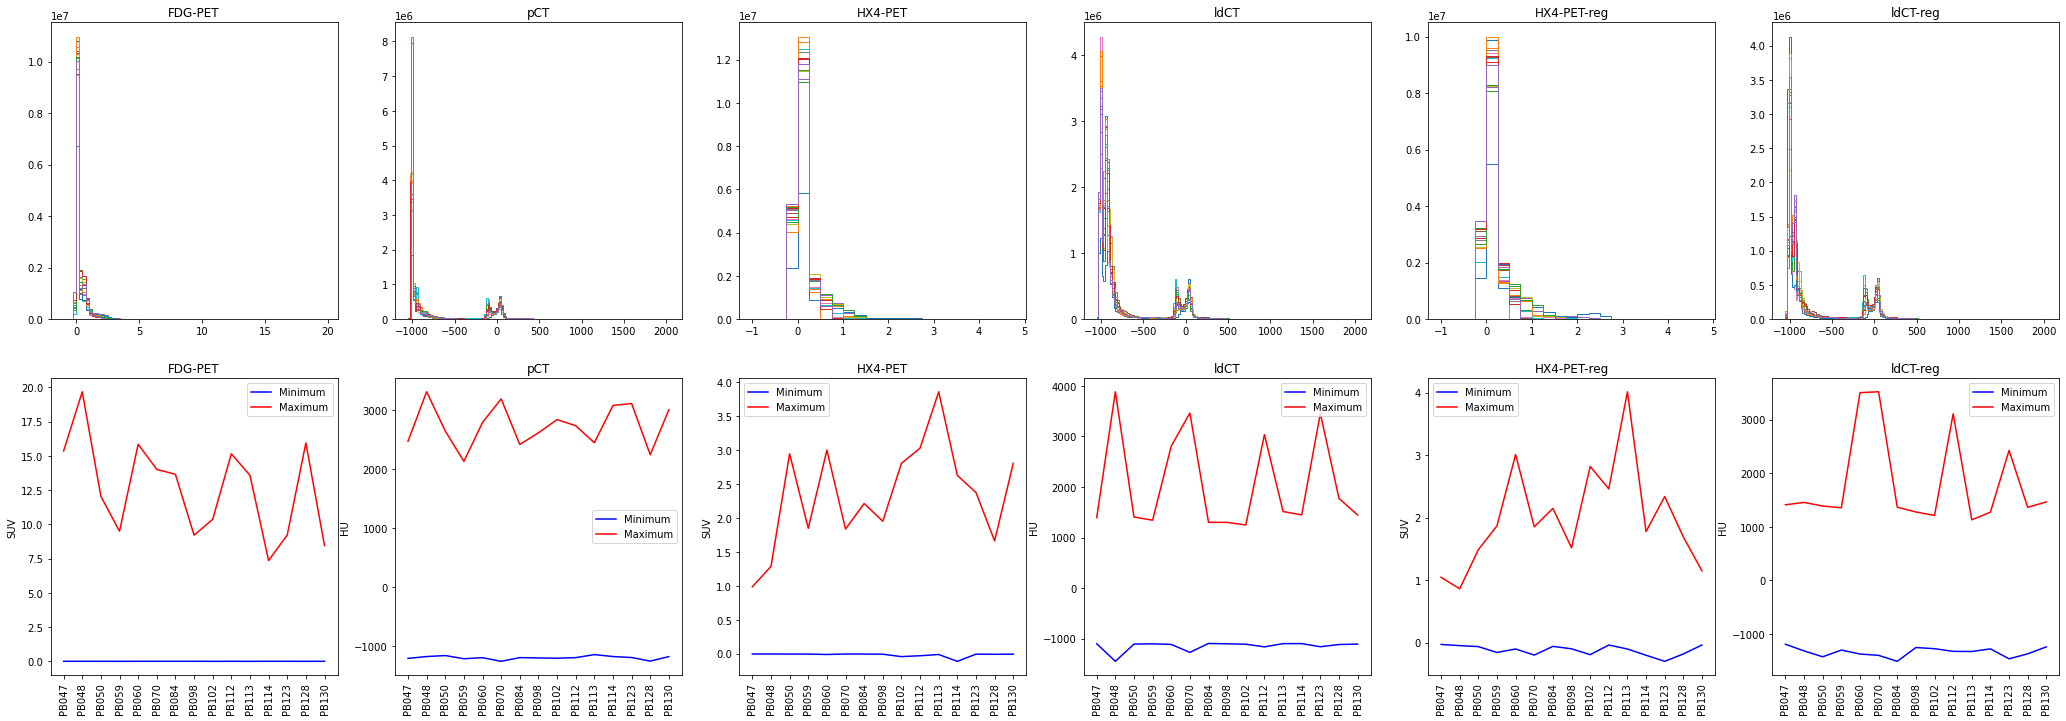

Global range --
FDG-PET: (-0.0043660244, 19.682493)
pCT: (-1254.3068, 3306.7075)
HX4-PET: (-0.11128735, 3.8596203)
ldCT: (-1450.3358, 3885.448)
HX4-PET-reg: (-0.301124, 4.012649)
ldCT-reg: (-1508.6012, 3521.3076)


In [43]:
# For train images

fig, axs = plt.subplots(2, 6, figsize=(36, 12))

fdg_pet_range = IntensityRange()
pct_range = IntensityRange()
hx4_pet_range = IntensityRange()
ldct_range = IntensityRange()
hx4_pet_reg_range = IntensityRange()
ldct_reg_range = IntensityRange()


for p_id in tqdm(train_set_patients):
    
    # Read images
    patient_dir = f"{train_set_dir}/{p_id}"
    fdg_pet, pct, hx4_pet, ldct, hx4_pet_reg, ldct_reg = read_all_images_of_patient(patient_dir)
    
    # Plot Histogram
    plot_histogram(fdg_pet, axs[0][0], bin_min=-1, bin_max=20, bin_size=0.25, title="FDG-PET")
    plot_histogram(pct, axs[0][1], bin_min=-1050, bin_max=2050, bin_size=20, title="pCT")
    plot_histogram(hx4_pet, axs[0][2], bin_min=-1, bin_max=5, bin_size=0.25, title="HX4-PET")
    plot_histogram(ldct, axs[0][3], bin_min=-1050, bin_max=2050, bin_size=20, title="ldCT")
    plot_histogram(hx4_pet_reg, axs[0][4], bin_min=-1, bin_max=5, bin_size=0.25, title="HX4-PET-reg")
    plot_histogram(ldct_reg, axs[0][5], bin_min=-1050, bin_max=2050, bin_size=20, title="ldCT-reg")
    
    # Record range
    fdg_pet_range.record_range(fdg_pet)
    pct_range.record_range(pct)
    hx4_pet_range.record_range(hx4_pet)
    ldct_range.record_range(ldct)
    hx4_pet_reg_range.record_range(hx4_pet_reg)
    ldct_reg_range.record_range(ldct_reg)
    
#     break ##
    
# Plot patient vs. range
fdg_pet_range.plot_ranges(axs[1][0], train_set_patients, units='SUV', title="FDG-PET")
pct_range.plot_ranges(axs[1][1], train_set_patients, units='HU', title="pCT")
hx4_pet_range.plot_ranges(axs[1][2], train_set_patients, units='SUV', title="HX4-PET")
ldct_range.plot_ranges(axs[1][3], train_set_patients, units='HU', title="ldCT")
hx4_pet_reg_range.plot_ranges(axs[1][4], train_set_patients, units='SUV', title="HX4-PET-reg")
ldct_reg_range.plot_ranges(axs[1][5], train_set_patients, units='HU', title="ldCT-reg")
    
plt.show()

# Print global ranges
print("Global range --")
print("FDG-PET:", fdg_pet_range.get_global_range())
print("pCT:", pct_range.get_global_range())
print("HX4-PET:", hx4_pet_range.get_global_range())
print("ldCT:", ldct_range.get_global_range())
print("HX4-PET-reg:", hx4_pet_reg_range.get_global_range())
print("ldCT-reg:", ldct_reg_range.get_global_range())